<a href="https://colab.research.google.com/github/francoquintanilla0/Modulo2-ML/blob/main/Modelo_RegLin.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from google.colab import drive
drive.mount("/content/gdrive") 

Mounted at /content/gdrive


In [2]:
%cd '/content/gdrive/MyDrive/Colab Notebooks/Documentos IA'
!ls

/content/gdrive/MyDrive/Colab Notebooks/Documentos IA
advertising.csv  Marriage_Divorce_DB.csv  Valhalla23.csv
iris.data	 PlayDataset.csv	  wine.data
iris.names	 titanic		  wine.names


In [27]:
# Importamos librerias
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [4]:
# Importamos nuestro data frame
df = pd.read_csv('/content/gdrive/MyDrive/Colab Notebooks/Documentos IA/advertising.csv')
df.head()

,TV,Radio,Newspaper,Sales
0,230.1,37.8,69.2,22.1
1,44.5,39.3,45.1,10.4
2,17.2,45.9,69.3,12.0
3,151.5,41.3,58.5,16.5
4,180.8,10.8,58.4,17.9


In [5]:
# Contamos si hay datos NaNs
df.isna().sum()

TV           0
Radio        0
Newspaper    0
Sales        0
dtype: int64

In [6]:
# Vemos el tamaño de los datos para separar por train y test
df.shape

(200, 4)

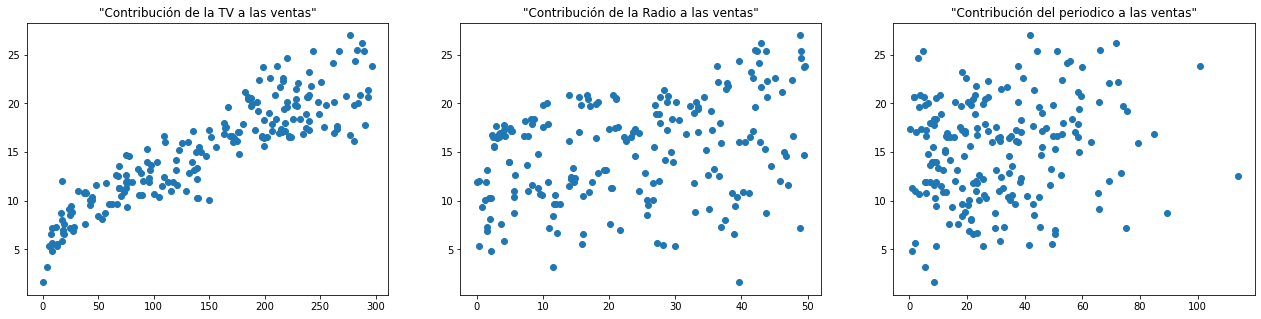

In [7]:
# Visualizamos nuestras variables para poder hacer un mejor analisis dobre la regresión
fig, ax = plt.subplots(1, 3, figsize=(22,5))

ax[0].scatter(df['TV'], df['Sales'])
ax[0].set_title('"Contribución de la TV a las ventas"')

ax[1].scatter(df['Radio'], df['Sales'])
ax[1].set_title('"Contribución de la Radio a las ventas"')

ax[2].scatter(df['Newspaper'], df['Sales'])
ax[2].set_title('"Contribución del periodico a las ventas"')

plt.show()

In [8]:
# Vemos que la mejor opción sería irnos por la TV, por lo que
# dividimos nuestro data frame xs y nuestro goal (y) en est y train
x_train = df.iloc[0:160,0]
x_test = df.iloc[160:,0]

y_train = df.iloc[0:160,3]
y_test = df.iloc[160:,3]

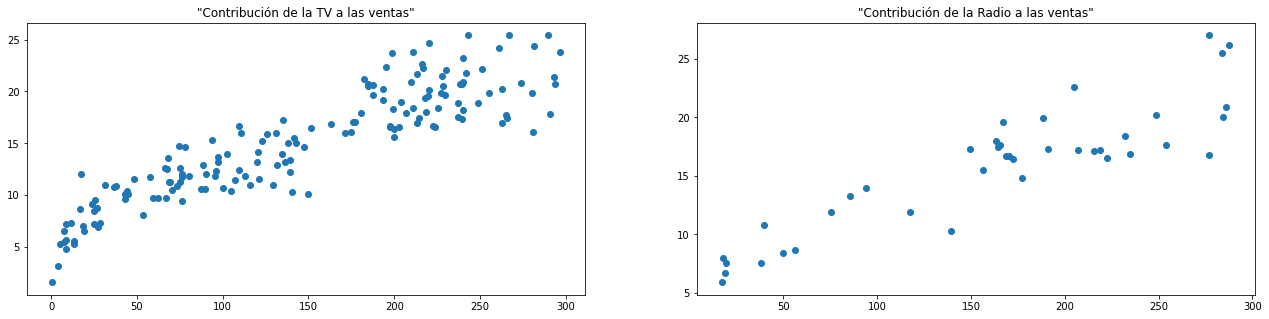

In [9]:
# Vemos como quedarón las gráficas
fig, ax = plt.subplots(1, 2, figsize=(22,5))

ax[0].scatter(x_train, y_train)
ax[0].set_title('"Contribución de la TV a las ventas"')

ax[1].scatter(x_test, y_test)
ax[1].set_title('"Contribución de la Radio a las ventas"')

plt.show()

In [10]:
# Hipótesis (entrenamiento y error)
h = lambda x, theta: theta[0] + theta[1]*x
j_i = lambda x, y, theta: (h(x, theta) - y)**2 

# Parametros
alpha = 0.001
n = 100000
theta = [7, 0.05]

# Entrenamiento
for i in range(n):
  delta = []
  deltax = []

  for x_i, y_i in zip(x_train, y_train):
    delta.append(h(x_i, theta) - y_i)
    deltax.append((h(x_i, theta) - y_i)*x_i)

  # Thetas
  theta[0] = theta[0] - alpha/n*sum(delta)
  theta[1] = theta[1] - alpha/n*sum(deltax)

print(theta)

[6.999767908024522, 0.055694672742209385]


In [11]:
# Training
delta_train = []
for x_i, y_i in zip(x_train, y_train):
  delta_train.append(j_i(x_i, y_i, theta))  
 
J_train = 1/(2*n)*sum(delta_train)

# Validación
delta_test = []
for x_i, y_i in zip(x_test, y_test):
  delta_test.append(j_i(x_i, y_i, theta))  
 
J_test = 1/(2*n)*sum(delta_test)

print("Error en el train:", J_train)
print("Error en el test:", J_test)
print("Valores de las thetas", theta)

Error en el train: 0.004129573354355341
Error en el test: 0.0010920099643497926
Valores de las thetas [6.999767908024522, 0.055694672742209385]


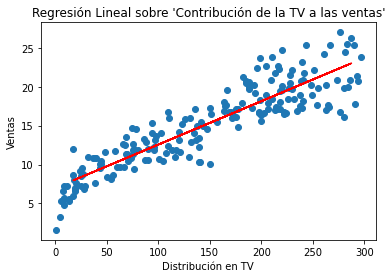

In [12]:
plt.scatter(df['TV'], df['Sales'])
plt.plot(x_test, theta[0] + theta[1]*x_test, 'r')
plt.title("Regresión Lineal sobre 'Contribución de la TV a las ventas'")
plt.xlabel("Distribución en TV")
plt.ylabel("Ventas")
plt.show()

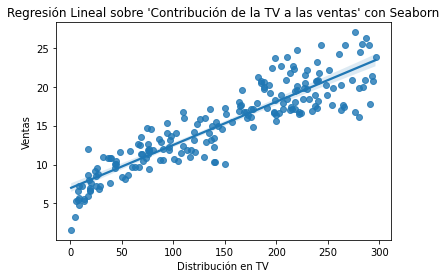

In [13]:
# Podemos comparar con seaborn a ver que tan parecidos estamos.
sns.regplot(x='TV', y='Sales', data=df)
plt.title("Regresión Lineal sobre 'Contribución de la TV a las ventas' con Seaborn")
plt.xlabel("Distribución en TV")
plt.ylabel("Ventas")
plt.show()

In [30]:
# Hacemos algunas predicciones
y_pred = theta[0] + theta[1]*x_test

# Calculamos el coeficiente de determinación
c_mat = np.corrcoef(y_test, y_pred)
CoD = c_mat[0,1]
CoD = CoD**2
print("El coeficiente de determinación es de:", CoD)

# Calculamos el MSE (Mean Squared Error)
MSE = np.square(np.subtract(y_test, y_pred)).mean()
print("El error cuadratico medio es de:", MSE)

El coeficiente de determinación es de: 0.8012241758834486
El error cuadratico medio es de: 5.460049821748964


Como podemos ver, vamos por buen camino de la regresión lineal de primer orden con un coeficiente de determinación de 0.798, el cual se podría mejorar y ajustar con un modelo de regresión no lineal. 

Si tratamos de meter las variables de "Radio" y "Newspaper" el modelo empieza a tener errores demasiado grandes y el modelo ya no se ajusta correctamente, ya que estas variables meten demasiado ruido a nuestro probelma original.